The datasets provided include the players data for the Career Mode from FIFA 20 ("players_20.csv").

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import itertools 
import seaborn as sns
import math

In [2]:
data = pd.read_csv('players_20.csv')

In [3]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
data.drop(['gk_diving', 'gk_handling', 'gk_kicking', 
    'gk_reflexes', 'gk_speed', 'gk_positioning', 
    'goalkeeping_handling', 'goalkeeping_kicking', 
    'goalkeeping_positioning', 'goalkeeping_reflexes', 
    'goalkeeping_diving','team_position', 'short_name', 'long_name'],axis=1,inplace=True)

In [5]:
data.head()

,sofifa_id,player_url,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,34,1985-02-05,187,83,Portugal,Juventus,93,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Bandingkan atribut berdasarkan masing-masing rolesnya

In [6]:
#print(data.loc[data['player_positions'] == 'GK'])
gk_players = data.loc[data['player_positions'] == 'GK']

# "RW", "LW"
wing_players_RW = data.loc[data['player_positions'] == 'RW']   
wing_players_LW = data.loc[data['player_positions'] == 'LW']
wing_players = pd.concat([wing_players_LW, wing_players_RW]).drop_duplicates().reset_index(drop=True)

#"CM" "LM" "RM"
midfielder_players_CM = data.loc[data['player_positions'] == 'CM']
midfielder_players_LM = data.loc[data['player_positions'] == 'LM']
midfielder_players_RM = data.loc[data['player_positions'] == 'RM']
midfielder_players = pd.concat([midfielder_players_CM, midfielder_players_LM, midfielder_players_RM]).drop_duplicates().reset_index(drop=True)

#"CB", "RB", "LB"
cb_players_CB = data.loc[data['player_positions'] == 'CB']
cb_players_RB = data.loc[data['player_positions'] == 'LM']
cb_players_LB = data.loc[data['player_positions'] == 'RM']
cb_players = pd.concat([cb_players_CB, cb_players_LB, cb_players_RB]).drop_duplicates().reset_index(drop=True)

#"CF", "ST"
st_players_CF = data.loc[data['player_positions'] == 'CF']
st_players_ST = data.loc[data['player_positions'] == 'ST']
st_players = pd.concat([st_players_CF, st_players_ST]).drop_duplicates().reset_index(drop=True)

In [7]:
cb_players["player_tag"] = "Defenders"
wing_players["player_tag"] = "Wingers"
gk_players["player_tag"] = "Goal Keepers"
st_players["player_tag"] = "Strikers"
midfielder_players["player_tag"] = "Midfielders"
players = pd.concat([gk_players, cb_players, midfielder_players, wing_players, st_players], axis=0, join="outer")

<ipython-input-7-b6ac802aea01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_players["player_tag"] = "Goal Keepers"


In [8]:
def compare(data, x, y):
    sns.boxenplot(data[x], data[y])
    plt.xlabel("")
    plt.show()

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


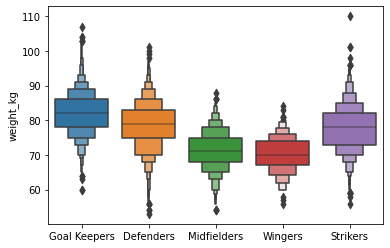

In [9]:
compare(players, "player_tag", "weight_kg")

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


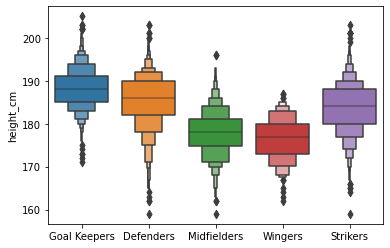

In [10]:
compare(players, "player_tag", "height_cm")

C:\Users\icoek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


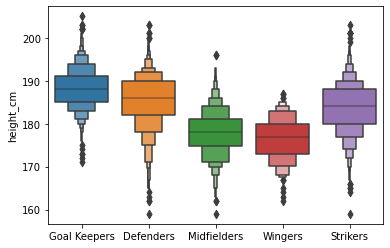

In [11]:
compare(players, "player_tag", "height_cm")

Kita dapat mengamati bahwa midfielders dan wingers pada umumnya lebih pendek dan beratnya lebih ringan dibandingkan dengan pemain lainnya. mereka memiliki atribut passing yang lebih tinggi karena itu adalah salah satu peran utama mereka dalam tim.

In [12]:
table_1 = pd.crosstab(players["player_tag"], players["body_type"])
players["body_type"] = players["body_type"].replace(["Courtois"], "Lean")
players["body_type"] = players["body_type"].replace(["Akinfenwa"], "Stocky")
table = pd.crosstab(players["player_tag"], players["body_type"])

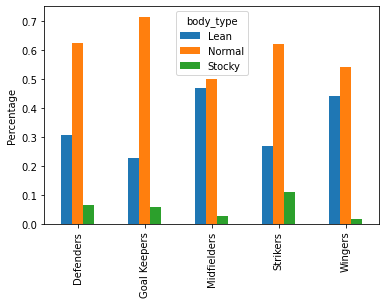

In [13]:
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('')
plt.ylabel('Percentage')
plt.show()

Pada grafik kita bisa melihat perbandingan tipe tubuh antara roles

In [14]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## 1. Data Wrangling

Kami akan berkonsentrasi hanya di posisi pertama, dan meninggalkan penjaga gawang

In [15]:
data['label'] = data['player_positions'].str.split(',').apply(lambda x: x[0])
data = data[data['label'] != 'GK']

<AxesSubplot:>

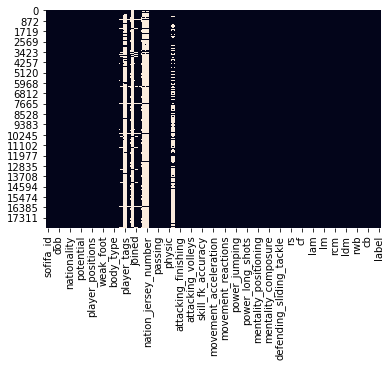

In [16]:
sns.heatmap(data.isnull(), cbar=False)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 0 to 18277
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   16242 non-null  int64  
 1   player_url                  16242 non-null  object 
 2   age                         16242 non-null  int64  
 3   dob                         16242 non-null  object 
 4   height_cm                   16242 non-null  int64  
 5   weight_kg                   16242 non-null  int64  
 6   nationality                 16242 non-null  object 
 7   club                        16242 non-null  object 
 8   overall                     16242 non-null  int64  
 9   potential                   16242 non-null  int64  
 10  value_eur                   16242 non-null  int64  
 11  wage_eur                    16242 non-null  int64  
 12  player_positions            16242 non-null  object 
 13  preferred_foot              162

### Remove Useless Features
Menggunakan pengetahuan a-priori untuk menghapus fitur yang tidak berguna

In [18]:
from IPython.display import display
with pd.option_context('display.max_rows', 200, 'display.max_columns', 10):
    display(data.head().T) 

,0,1,2,4,5
sofifa_id,158023,20801,190871,183277,192985
player_url,https://sofifa.com/player/158023/lionel-messi/...,https://sofifa.com/player/20801/c-ronaldo-dos-...,https://sofifa.com/player/190871/neymar-da-sil...,https://sofifa.com/player/183277/eden-hazard/2...,https://sofifa.com/player/192985/kevin-de-bruy...
age,32,34,27,28,28
dob,1987-06-24,1985-02-05,1992-02-05,1991-01-07,1991-06-28
height_cm,170,187,175,175,181
weight_kg,72,83,68,74,70
nationality,Argentina,Portugal,Brazil,Belgium,Belgium
club,FC Barcelona,Juventus,Paris Saint-Germain,Real Madrid,Manchester City
overall,94,93,92,91,91
potential,94,93,92,91,91


In [19]:
useless_features = ['sofifa_id', 'player_url', 'club', 'player_positions', 
                    'real_face', 'team_jersey_number', 'loaned_from', 'nation_position', 
                    'nation_jersey_number', 'dob']
data.drop(useless_features, axis=1, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16242 entries, 0 to 18277
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         16242 non-null  int64  
 1   height_cm                   16242 non-null  int64  
 2   weight_kg                   16242 non-null  int64  
 3   nationality                 16242 non-null  object 
 4   overall                     16242 non-null  int64  
 5   potential                   16242 non-null  int64  
 6   value_eur                   16242 non-null  int64  
 7   wage_eur                    16242 non-null  int64  
 8   preferred_foot              16242 non-null  object 
 9   international_reputation    16242 non-null  int64  
 10  weak_foot                   16242 non-null  int64  
 11  skill_moves                 16242 non-null  int64  
 12  work_rate                   16242 non-null  object 
 13  body_type                   162

Mengubah beberapa fitur menjadi numerik.

In [21]:
data.iloc[:, 54:-1] = data.iloc[:, 54:-1].apply(lambda x: x.str.split('+').apply(lambda x: x[0])).astype(np.int64)

In [22]:
import datetime
anchor_date = pd.to_datetime('01.01.2020')

data['seniority'] = (pd.to_datetime(datetime.datetime.now()) - pd.to_datetime(data['joined'])).dt.days / 365
data['years_untill_contract_done'] = (data['contract_valid_until'] - anchor_date.year)
data = data[data['years_untill_contract_done'] >= 0]

In [23]:
data = data.drop(['player_tags', 'player_traits', 'joined', 'contract_valid_until'], axis=1)

### Categorial Data

In [24]:
data.select_dtypes('object')

,nationality,preferred_foot,work_rate,body_type,label
0,Argentina,Left,Medium/Low,Messi,RW
1,Portugal,Right,High/Low,C. Ronaldo,ST
2,Brazil,Right,High/Medium,Neymar,LW
4,Belgium,Right,High/Medium,Normal,LW
5,Belgium,Right,High/High,Normal,CAM
...,...,...,...,...,...
18266,China PR,Right,Medium/Medium,Normal,CAM
18269,China PR,Right,Medium/Medium,Normal,CB
18270,England,Right,Medium/Medium,Lean,CM
18274,China PR,Right,Medium/Medium,Normal,CB


### Body type

In [25]:
data['body_type'].value_counts()

Normal                 8621
Lean                   5646
Stocky                  815
PLAYER_BODY_TYPE_25       1
Akinfenwa                 1
Neymar                    1
Shaqiri                   1
Messi                     1
C. Ronaldo                1
Name: body_type, dtype: int64

In [26]:
data = data[data['body_type'].isin(['Normal','Lean','Stocky'])]
data = pd.get_dummies(data, columns=['body_type'])

### work rate 

In [27]:
 data['work_rate'].value_counts()

Medium/Medium    7296
High/Medium      3008
Medium/High      1590
High/High         919
Medium/Low        814
High/Low          627
Low/Medium        419
Low/High          379
Low/Low            30
Name: work_rate, dtype: int64

In [28]:
data['work_rate'] = data['work_rate'].str.split('/').apply(lambda x: x[0])
data = pd.get_dummies(data, columns=['work_rate'])

### Preferred foot

In [29]:
 data['preferred_foot'].value_counts()
data = pd.get_dummies(data, columns=['preferred_foot'], drop_first=True)

###  Nationality 

In [30]:
 data['nationality'].value_counts()

England                1482
Germany                1048
Spain                   919
France                  873
Argentina               732
                       ... 
Bahrain                   1
St Lucia                  1
Macau                     1
Hong Kong                 1
São Tomé & Príncipe       1
Name: nationality, Length: 156, dtype: int64

In [31]:
nationality_threshold = 100
nations = list(data['nationality'].value_counts()[data['nationality'].value_counts() > nationality_threshold].index)
data.loc[~data['nationality'].isin(nations), 'nationality'] = 'Other'
data = pd.get_dummies(data, columns=['nationality'])

### Label

In [32]:
labels = data['label']
data.drop('label', axis=1, inplace=True)

In [33]:
len(np.unique(labels))

14

In [34]:
np.unique(labels)

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'LB', 'LM', 'LW', 'LWB', 'RB',
       'RM', 'RW', 'RWB', 'ST'], dtype=object)

In [35]:
classes_mapping = {
    'CAM' : 'M',
    'CDM' : 'M',
    'CM' : 'M',
    'LM' : 'M',
    'RM' : 'M',
    'CB' : 'D',
    'LB' : 'D',
    'LWB' : 'D',
    'RB' : 'D',
    'RWB' : 'D',
    'CF' : 'F',
    'LW' : 'F',
    'RW' : 'F',
    'ST' : 'F',
}
labels_reduced = labels.replace(classes_mapping)

### Normalization 

In [36]:
np.any(np.isnan(data))

True

In [37]:
data.fillna(data.mean(), inplace=True) 

In [38]:
data_norm = (data - data.mean()) / data.std()

## Clustering

In [39]:
X = data_norm.to_numpy()
y = labels_reduced.to_numpy()

In [40]:
from sklearn.cluster import DBSCAN

epsilons = np.linspace(3, 13, 200)
dbscans = [DBSCAN(eps=eps).fit(X) for eps in epsilons]

for i, scan in enumerate(dbscans):
    print(f'Loc {i}: For eps={epsilons[i]} -> {np.unique(scan.labels_)} clusters.')

Loc 0: For eps=3.0 -> [-1  0  1  2  3] clusters.
Loc 1: For eps=3.050251256281407 -> [-1  0  1  2  3] clusters.
Loc 2: For eps=3.100502512562814 -> [-1  0  1  2  3  4] clusters.
Loc 3: For eps=3.150753768844221 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 4: For eps=3.201005025125628 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 5: For eps=3.251256281407035 -> [-1  0  1  2  3  4  5  6  7  8  9 10] clusters.
Loc 6: For eps=3.301507537688442 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11] clusters.
Loc 7: For eps=3.351758793969849 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12] clusters.
Loc 8: For eps=3.4020100502512562 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] clusters.
Loc 9: For eps=3.4522613065326633 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23] clusters.
Loc 10: For eps=3.5025125628140703 -> [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25] clusters.
Loc 11: For eps=3.5527638190954773 -> [-1  0  1  2 

Loc 141: For eps=10.085427135678392 -> [-1  0  1  2  3  4  5  6  7] clusters.
Loc 142: For eps=10.1356783919598 -> [-1  0  1  2  3  4  5  6  7] clusters.
Loc 143: For eps=10.185929648241206 -> [-1  0  1  2  3  4  5  6  7] clusters.
Loc 144: For eps=10.236180904522612 -> [-1  0  1  2  3  4  5  6  7] clusters.
Loc 145: For eps=10.28643216080402 -> [-1  0  1  2  3  4  5  6  7] clusters.
Loc 146: For eps=10.336683417085428 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 147: For eps=10.386934673366834 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 148: For eps=10.43718592964824 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 149: For eps=10.487437185929648 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 150: For eps=10.537688442211056 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 151: For eps=10.587939698492463 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 152: For eps=10.638190954773869 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 153: For eps=10.688442211055277 -> [-1  0  1  2  3  4  5  6] clusters.
Loc 154: For e

In [41]:
unique_l, counts_l = np.unique(labels_reduced, return_counts=True)
print(np.asarray((unique_l, counts_l)).T)

[['D' 5528]
 ['F' 3188]
 ['M' 6366]]


In [42]:
dbscan = DBSCAN(eps=12.25).fit(X)
t = dbscan.labels_
t[t<0] = 999
unique, counts = np.unique(t, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 14855]
 [    1   110]
 [    2   112]
 [  999     5]]


Hasilnya cukup buruk.
Kita perlu menyelidiki mengapa proses clusteringnya seperti ini
Langkah selanjutnya yang harus kita buat perlu membawa kita ke pemahaman yang lebih baik tentang sampel yang tersebar.

## Dimenstionality Reduction

('F', 'b')
('M', 'r')
('D', 'g')


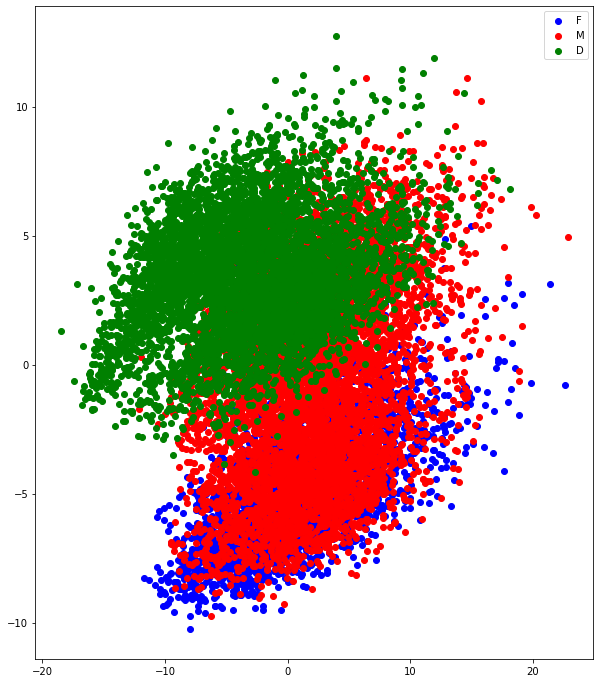

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
x_pca = pca.transform(X)

colors_map = zip(labels_reduced, ['b', 'r', 'g'])

f = plt.figure(figsize=(10,12))
for c in colors_map:
    plt.scatter(x_pca[y == c[0], 0], x_pca[y == c[0], 1], c=c[1])
    print(c)
plt.legend(labels_reduced)

In [44]:
classes_mapping_high = {
    'CAM' : 'F',
    'CDM' : 'D',
    'CM' : 'F',
    'LM' : 'M',
    'RM' : 'M',
    'CB' : 'D',
    'LB' : 'D',
    'LWB' : 'D',
    'RB' : 'D',
    'RWB' : 'D',
    'CF' : 'F',
    'LW' : 'F',
    'RW' : 'F',
    'ST' : 'F',
}
labels_reduced_high = labels.replace(classes_mapping)